In [191]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import gzip
import json
from sklearn.neighbors import KNeighborsClassifier

In [126]:
combined =ad.read_h5ad("combined9_2_0920.h5ad")

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [127]:
rna_index = ad.read_h5ad("rnalbc_0918.h5ad")

In [128]:
rna = combined[combined.obs['domain'] == 'rna']
meta = combined[combined.obs['domain'] == 'meta']
df_rna = pd.DataFrame(rna.obsm['X_glue'])
df_meta = pd.DataFrame(meta.obsm['X_glue'])

In [129]:
df_rna_adata = ad.AnnData(X=df_rna)
df_meta_adata = ad.AnnData(X=df_meta)
df_rna_adata.obs = pd.DataFrame(index=rna.obs.index)
df_meta_adata.obs = pd.DataFrame(index=meta.obs.index)

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [130]:
df_meta_adata.obs['x'] = df_meta_adata.obs.index.str.split('x').str[0]
df_meta_adata.obs['y'] = df_meta_adata.obs.index.str.split('x').str[1]
df_meta_adata.obs['array_row'] = df_meta_adata.obs['x']
df_meta_adata.obs['array_col'] = df_meta_adata.obs['y']
df_meta_adata.obs['x_spa'] = df_meta_adata.obs['x'].astype(float) * 117.6471
df_meta_adata.obs['y_spa'] = df_meta_adata.obs['y'].astype(float) * 117.6471

In [131]:
df_rna_adata.obs['domain'] = 'rna'
df_meta_adata.obs['domain'] = 'meta'
combined = ad.concat([df_rna_adata, df_meta_adata])

In [132]:
combined.var_names_make_unique()
combined.layers["counts"] = combined.X.copy()
sc.pp.highly_variable_genes(combined, flavor="cell_ranger", n_top_genes=50)
sc.pp.normalize_total(combined, inplace=True)
sc.pp.pca(combined)
sc.pp.neighbors(combined)
sc.tl.umap(combined)

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [135]:
sc.tl.louvain(
    combined,
    resolution=0.5,
    random_state=0,

    key_added='louvain',
    directed=False,
)

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


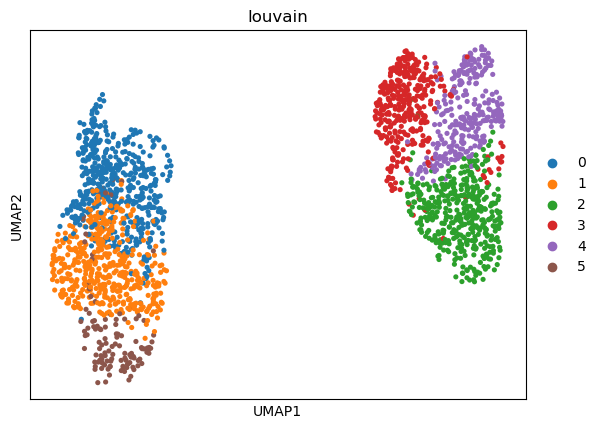

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


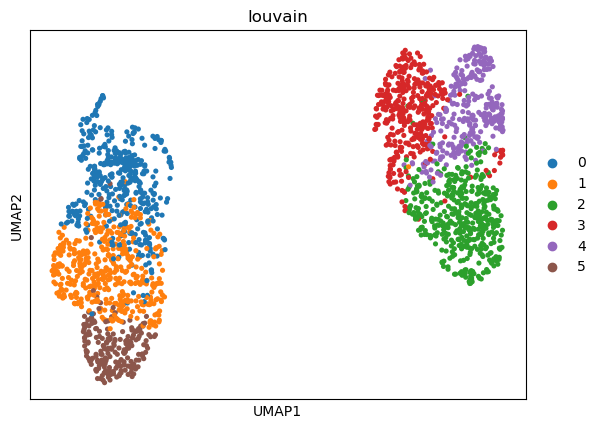

In [136]:
domain_rna = combined[combined.obs['domain'] == 'rna']
sc.pl.umap(domain_rna, color='louvain')
domain_meta = combined[combined.obs['domain'] == 'meta']
sc.pl.umap(domain_meta, color='louvain')

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


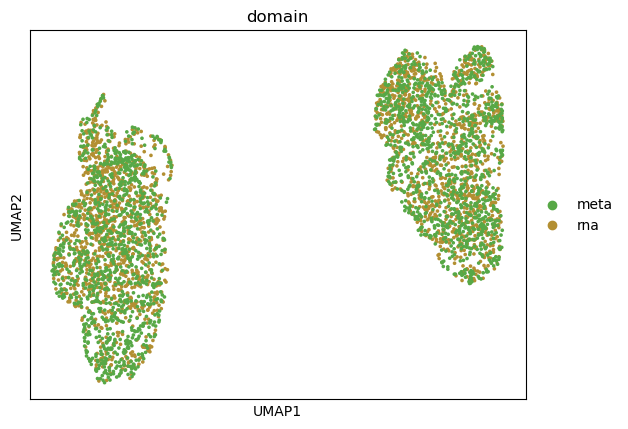

In [137]:
palette={'rna': '#b38f32','meta':'#57a846'}
sc.pl.umap(combined, color='domain',palette=palette)

In [138]:
meta_spa = ad.read_h5ad("meta9_2_0918.h5ad")
meta_spa.obs['louvain'] = domain_meta.obs['louvain']

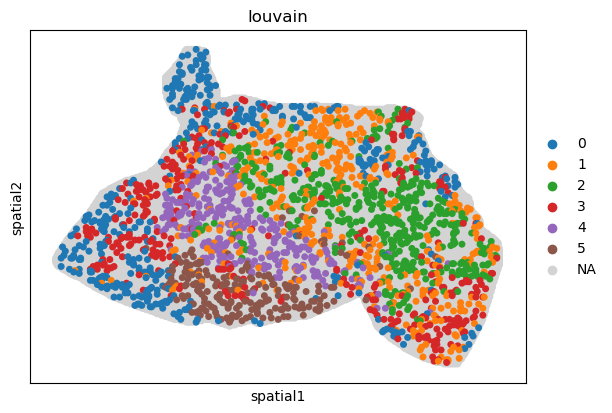

In [139]:
sc.pl.spatial(meta_spa, color="louvain", spot_size=5)

In [188]:
df_meta_adata.obs

,x,y,array_row,array_col,x_spa,y_spa,domain
123x153,123,153,123,153,14470.5933,18000.0063,meta
135x37,135,37,135,37,15882.3585,4352.9427,meta
100x184,100,184,100,184,11764.7100,21647.0664,meta
178x143,178,143,178,143,20941.1838,16823.5353,meta
125x155,125,155,125,155,14705.8875,18235.3005,meta
...,...,...,...,...,...,...,...
284x200,284,200,284,200,33411.7764,23529.4200,meta
238x177,238,177,238,177,28000.0098,20823.5367,meta
187x53,187,53,187,53,22000.0077,6235.2963,meta
130x74,130,74,130,74,15294.1230,8705.8854,meta


In [140]:
rna_spa = ad.read_h5ad("rnalbc_0918.h5ad")
rna_spa.obs['louvain'] = domain_rna.obs['louvain']

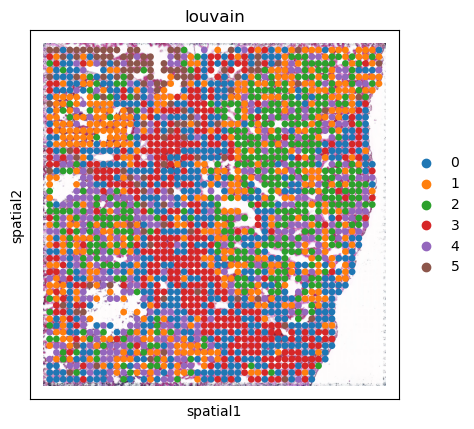

In [141]:
sc.pl.spatial(rna_spa, color="louvain",size=1)

In [222]:
combined

AnnData object with n_obs × n_vars = 4344 × 50
    obs: 'domain', 'louvain'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'louvain', 'domain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

# 1.提取cluster信息

In [142]:
Y_rna = pd.DataFrame(domain_rna.layers['counts'])
init_rna = domain_rna.obs['louvain'] 
init_rna = init_rna.array

# 2.提取Spatial信息

In [143]:
def find_neighbors(sce, platform):
    if platform == "Visium":
        # Spots to left and right, two above, two below
        offsets = pd.DataFrame({
            'x.offset': [-2, 2, -1, 1, -1, 1],
            'y.offset': [0, 0, -1, -1, 1, 1]
        })
    elif platform == "ST":
        # L1 radius of 1 (spots above, right, below, and left)
        offsets = pd.DataFrame({
            'x.offset': [0, 1, 0, -1],
            'y.offset': [-1, 0, 1, 0]
        })
    else:
        raise ValueError(f".find_neighbors: Unsupported platform \"{platform}\".")

    # Get array coordinates (and label by index of spot in SCE)
    spot_positions = sce.obs[['array_col', 'array_row']]
    spot_positions.loc[:, 'spot.idx'] = range(len(spot_positions))

    # Compute coordinates of each possible spot neighbor
    neighbor_positions = pd.merge(spot_positions, offsets, how='cross')
    neighbor_positions['array_col'] = neighbor_positions['array_col'].astype(float)
    neighbor_positions['array_row'] = neighbor_positions['array_row'].astype(float)
    neighbor_positions['x.pos'] = neighbor_positions['array_col'] + neighbor_positions['x.offset']
    neighbor_positions['y.pos'] = neighbor_positions['array_row'] + neighbor_positions['y.offset']

    # Select spots that exist at neighbor coordinates
    neighbors = pd.merge(
        neighbor_positions,
        spot_positions,
        left_on=['x.pos', 'y.pos'],
        right_on=['array_col', 'array_row'],
        suffixes=('.primary', '.neighbor'),
        how='left'
    )

    # Shift to zero-indexing for C++
    neighbors['spot.idx.neighbor'] = neighbors['spot.idx.neighbor'] - 1

    # Group neighbor indices by spot
    neighbors = neighbors.sort_values(by=['spot.idx.primary', 'spot.idx.neighbor'])
    df_j = neighbors.groupby('spot.idx.primary')['spot.idx.neighbor'].apply(list)

    # Discard neighboring spots without spot data
    df_j = df_j.apply(lambda nbrs: [x for x in nbrs if not pd.isna(x)])

    # Log number of spots with neighbors
    n_with_neighbors = len(df_j[df_j.apply(len) > 0])
    print(f"Neighbors were identified for {n_with_neighbors} out of {sce.shape[1]} spots.")

    return df_j

# 假设 sce 是一个 Seurat 对象的 Python 等价物，你需要根据实际情况调整代码。

In [144]:
domain_rna.obs['array_row']=rna_index.obs['array_row']
domain_rna.obs['array_col']=rna_index.obs['array_col']

In [145]:
df_j_rna = find_neighbors(domain_rna, 'ST')

Neighbors were identified for 2171 out of 50 spots.


C:\Users\yaobo\AppData\Local\Temp\ipykernel_34100\94986292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_positions.loc[:, 'spot.idx'] = range(len(spot_positions))


# 3.MCMC chain

In [146]:
import numpy as np
from scipy.stats import wishart, multivariate_normal
import random
from tqdm import tqdm
def iterate(Y, df_j, nrep, n, d, gamma, q, init, mu0, lambda0, alpha, beta):
    # Initialize matrices storing iterations
    df_sim_z = np.zeros((nrep, n), dtype=int)
    df_sim_mu = np.zeros((nrep, q * d))
    df_sim_lambda = [None] * nrep
    plogLik = np.full(nrep, np.nan)

    # Initialize parameters
    initmu = np.tile(mu0, q)
    df_sim_mu[0, :] = initmu
    df_sim_lambda[0] = lambda0
    df_sim_z[0, :] = init

    mu0vec = np.array(mu0)

    # Iterate with tqdm
    for i in tqdm(range(1, nrep), desc='Iteration progress'):
        # Update mu
        mu_i = np.zeros((q, d))
        lambda_prev = df_sim_lambda[i - 1]
        for k in range(1, q + 1):
            index_1k = np.where(df_sim_z[i - 1, :] == k)[0]
            n_i = len(index_1k)
            Ysums = np.sum(Y.iloc[index_1k, :], axis=0)
            mean_i = np.linalg.inv(lambda0 + n_i * lambda_prev).dot(
                lambda0.dot(mu0vec) + lambda_prev.dot(Ysums)
            )
            var_i = np.linalg.inv(lambda0 + n_i * lambda_prev)
            mu_i[k - 1, :] = multivariate_normal.rvs(mean=mean_i, cov=var_i)
        
        df_sim_mu[i, :] = mu_i.flatten()

        # Update lambda
        mu_i_long = np.zeros((n, d))
        for j in range(n):
            mu_i_long[j, :] = mu_i[df_sim_z[i - 1, j] - 1, :]
        
        sumofsq = (Y - mu_i_long).T.dot(Y - mu_i_long)
        Vinv = np.diag([beta] * d)
        lambda_i = wishart.rvs(df=n + alpha, scale=np.linalg.inv(Vinv + sumofsq))
        df_sim_lambda[i] = lambda_i
        sigma_i = np.linalg.inv(lambda_i)

        # Update z
        df_sim_z[i, :] = df_sim_z[i - 1, :]
        plogLikj = np.full(n, np.nan)
        for j in range(n):
            z_j_prev = df_sim_z[i, j]
            qlessk = [x for x in range(1, q + 1) if x != z_j_prev]
            z_j_new = random.choice(qlessk)
            j_vector = df_j[j]
            
            if len(j_vector) != 0:
                # 确保 df_sim_z 是一个 NumPy 数组
                df_sim_z_array = df_sim_z.values if isinstance(df_sim_z, pd.DataFrame) else df_sim_z
    
                # 获取满足条件的行索引
                # print(pd.DataFrame(df_sim_z_array))
                # print('i',i)
                #print('j_vec',j_vector)
                #print('prev',z_j_prev)
                #print('new',z_j_new)
                j_vector = [int(x) for x in j_vector]
                row_indices_prev = df_sim_z_array[i, :][j_vector] == z_j_prev
                row_indices_new = df_sim_z_array[i, :][j_vector] == z_j_new

                # 计算满足条件的元素数量
                n_prev = np.sum(row_indices_prev)
                n_new = np.sum(row_indices_new)

                # print(type(Y))
                # print(Y.index)
    
                # 计算 h_z_prev 和 h_z_new
                h_z_prev = gamma / len(j_vector) * 2 * n_prev + multivariate_normal.logpdf(
                    Y.iloc[j, :], mean=mu_i[z_j_prev - 1, :], cov=sigma_i
                )
                h_z_new = gamma / len(j_vector) * 2 * n_new + multivariate_normal.logpdf(
                    Y.iloc[j, :], mean=mu_i[z_j_new - 1, :], cov=sigma_i
                )
            else:
                h_z_prev = multivariate_normal.logpdf(
                    Y.iloc[j, :], mean=mu_i[z_j_prev - 1, :], cov=sigma_i
                )
                h_z_new = multivariate_normal.logpdf(
                    Y.iloc[j, :], mean=mu_i[z_j_new - 1, :], cov=sigma_i
                )

            prob_j = np.exp(h_z_new - h_z_prev)
            prob_j = min(prob_j, 1)
            df_sim_z[i, j] = np.random.choice([z_j_prev, z_j_new], p=[1 - prob_j, prob_j])
            plogLikj[j] = h_z_prev
        
        plogLik[i] = np.sum(plogLikj)

    return {
        "z": df_sim_z,
        "mu": df_sim_mu,
        "lambda": df_sim_lambda,
        "plogLik": plogLik
    }


In [161]:
Y = Y_rna
q = 5
df_j = df_j_rna
nrep = 500
d = Y.shape[1]
n = Y.shape[0]
init = init_rna
gamma = 3
mu0 = Y.mean()
lambda0 = np.diag(np.full(Y.shape[1], 0.01))
alpha = 1
beta = 0.01

results = iterate(Y, df_j, nrep, n, d, gamma, q, init, mu0, lambda0, alpha, beta)

Iteration progress: 100%|████████████████████████████████████████████████████████████| 499/499 [41:14<00:00,  4.96s/it]


In [162]:
z = results['z']
z = pd.DataFrame(z)

mode_values = z.mode()
mode_series = mode_values.iloc[0]
mode_df = pd.DataFrame([mode_series])

In [163]:
mode_df = mode_df.T
mode_df.index = rna_spa.obs.index
rna_spa.obs['bayes'] = mode_df

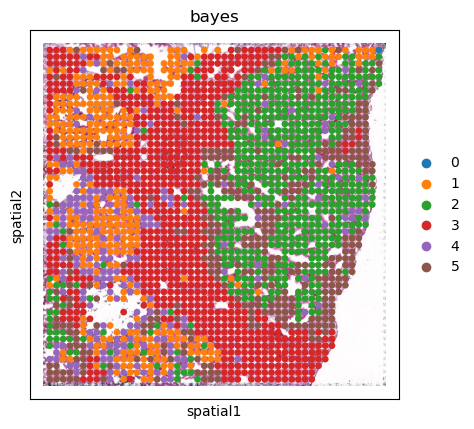

In [164]:
rna_spa.obs['bayes'] = rna_spa.obs['bayes'].astype('category')
sc.pl.spatial(rna_spa, color="bayes",size=1)

In [172]:
domain_meta.obs

,domain,louvain,array_row,array_col
123x153,meta,4,123,153
135x37,meta,3,135,37
100x184,meta,5,100,184
178x143,meta,4,178,143
125x155,meta,3,125,155
...,...,...,...,...
284x200,meta,3,284,200
238x177,meta,2,238,177
187x53,meta,1,187,53
130x74,meta,2,130,74


In [177]:
Y_meta = pd.DataFrame(domain_meta.layers['counts'])
domain_meta.obs['array_row']=df_meta_adata.obs['array_row'].astype(int)
domain_meta.obs['array_col']=df_meta_adata.obs['array_col'].astype(int)
df_j_meta = find_neighbors(domain_meta, 'ST')
d = Y_meta.shape[1]
n = Y_meta.shape[0]
init_meta = domain_meta.obs['louvain']
mu0 = Y_meta.mean()
lambda0 = np.diag(np.full(Y_meta.shape[1], 0.01))
results_meta = iterate(Y_meta, df_j_meta, nrep, n, d, gamma, 6, init, mu0, lambda0, alpha, beta)

C:\Users\yaobo\AppData\Local\Temp\ipykernel_34100\94986292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_positions.loc[:, 'spot.idx'] = range(len(spot_positions))


Neighbors were identified for 437 out of 50 spots.


Iteration progress: 100%|████████████████████████████████████████████████████████████| 499/499 [39:16<00:00,  4.72s/it]


In [178]:
meta_spa = ad.read_h5ad("meta9_2_0918.h5ad")

In [179]:
z = results_meta['z']
z = pd.DataFrame(z)
# 计算每列的众数
mode_values = z.mode()

# 选择每列的众数的第一个值（因为mode()返回的是数据框，每列可能有多个值）
# 我们假设每列只有一个众数
mode_series = mode_values.iloc[0]

# 现在 mode_series 是一个1x160的序列，即我们想要的1x160的数据框
# 如果你想将它转换为数据框，可以这样做：
mode_df = pd.DataFrame([mode_series])
mode_df = mode_df.T
mode_df.index = domain_meta.obs.index
meta_spa.obs['bayes'] = mode_df

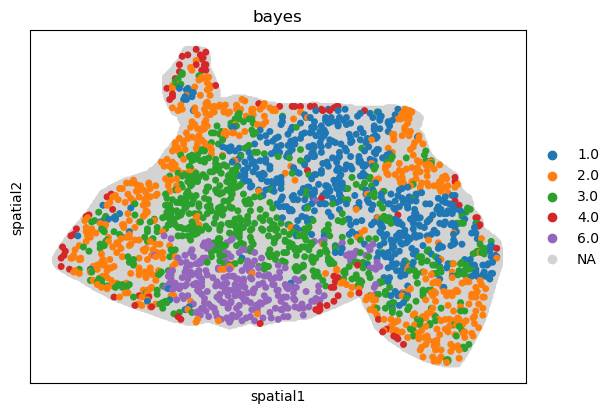

In [180]:
meta_spa.obs['bayes'] = meta_spa.obs['bayes'].astype('category')
sc.pl.spatial(meta_spa, color="bayes", spot_size=5)

In [190]:
meta_full =ad.read_h5ad("meta_full9_2_0920.h5ad")

In [216]:
X = meta_full.obsm['X_glue']  # 特征矩阵
labels = meta_spa.obs['bayes']  # 聚类标签列，包含 NaN


# 将有标签的数据分离为训练集
X_train = X[~labels.isna()]  # 使用 isna() 检测 NaN
y_train = labels[~labels.isna()]  # 有标签的数据


# 将没有标签的数据分离为测试集
X_test = X[labels.isna()]  # 无标签数据

# 定义 KNN 模型，选择合适的 K 值（假设为 5）
knn = KNeighborsClassifier(n_neighbors=10)

# 训练 KNN 模型
knn.fit(X_train, y_train)

# 预测没有标签的数据的聚类标签
predicted_labels = knn.predict(X_test)

meta_spa.obs['bayes_all'] = meta_spa.obs['bayes'].copy()

# 将预测的标签赋回原来的 NaN 位置，使用 isna()
meta_spa.obs.loc[labels.isna(), 'bayes_all'] = predicted_labels


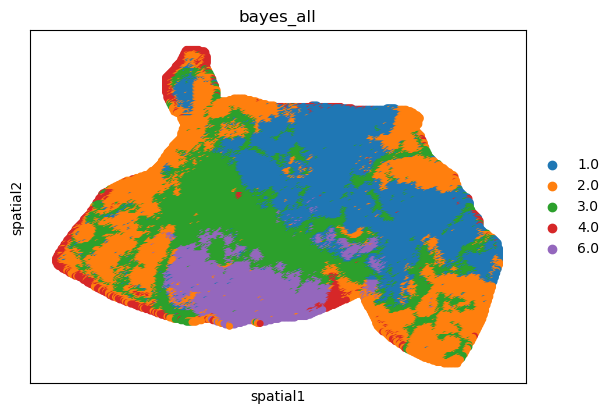

In [217]:
sc.pl.spatial(meta_spa, color="bayes_all", spot_size=5)

In [181]:
domain_rna.obs['bayes'] = rna_spa.obs['bayes']
domain_meta.obs['bayes'] = meta_spa.obs['bayes']

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


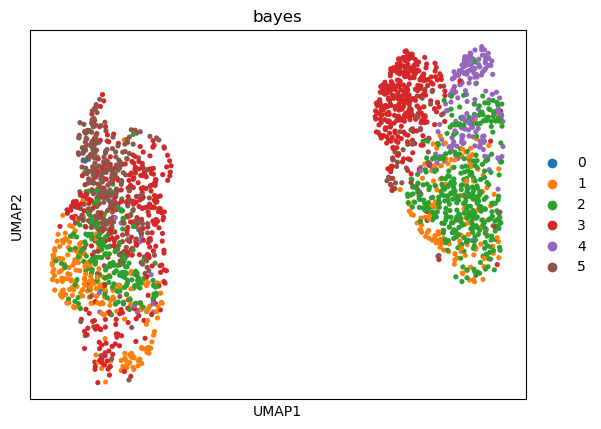

D:\BoYao\Anaconda3\envs\bc\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


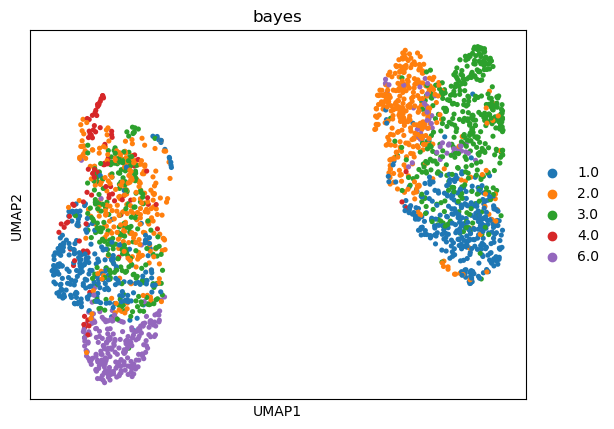

In [182]:
sc.pl.umap(domain_rna, color='bayes')
sc.pl.umap(domain_meta, color='bayes')

In [218]:
domain_rna.write_h5ad("domain_rna9_2.h5ad")
domain_meta.write_h5ad("domain_meta9_2.h5ad")
rna_spa.write_h5ad("rna_spa9_2.h5ad")
meta_spa.write_h5ad("meta_spa9_2.h5ad")